In [1]:
import spotpy
import os
import sys
import pandas as pd
import numpy as np
import subprocess
import shutil

In [2]:
sys.path.insert(1, 'd:/Projects/Tools/daycentpy_git')

In [3]:
from daycentpy import handler

- Set a working directory as project folder
- provide a path to your model folder

In [4]:
pwd = "d:/Projects/Tools/DayCent-CUTE/analysis/cali/"
md = "d:/Projects/Tools/DayCent-CUTE/analysis/Wooster/"

In [5]:
m1 = handler.SingleInit(pwd, md)

    We found DayCent parameter base file.
    Open the file and select parameters you are goint to use ..., 
    then save it as 'seleted_pars.csv'.


In [6]:
os.getcwd()

'd:\\Projects\\Tools\\DayCent-CUTE\\analysis\\cali'

In [7]:
sel_pars_df = m1.read_sel_dc_pars()

You have selected a total of 26 parameters.


In [8]:
sel_pars_df

,name,select,default,min,max,category
1,ANEREF(2),1,3.000000,2.800000,5.0000,fix
2,ANEREF(3),1,1.000000,0.200000,1.1000,fix
9,DEC3(1),1,6.000000,4.000000,8.0000,fix
11,DEC4,1,0.004300,0.001000,0.0050,fix
12,DEC5(2),1,0.120000,0.070000,0.2500,fix
20,FWLOSS(4),1,0.750000,0.200000,2.0000,fix
21,OMLECH(1),1,0.030000,0.000001,1.0000,fix
24,P1CO2A(2),1,0.170000,0.100000,0.2500,fix
25,P1CO2B(2),1,0.680000,0.550000,0.7400,fix
26,P2CO2(2),1,0.550000,0.500000,0.8000,fix


In [9]:
os.getcwd()

'd:\\Projects\\Tools\\DayCent-CUTE\\analysis\\cali'

In [10]:
os.chdir(os.path.join(os.getcwd(),'main'))

In [11]:
with open("DayCentRUN.DAT", "r") as f:
    data = [x.strip().split() for x in f]
print('')
print('  Simulation start ...')

for l, i in enumerate(range(len(data))):
    if len(data[i]) == 0:
        mlines = l
# mlines indicate only lines for model info
for i in range(mlines):
    if os.path.isfile(data[i][1]+".bin"):
        os.remove(data[i][1]+".bin")
    if len(data[i]) > 2:
        comline = 'DDcentEVI.exe -s {} -n {} -e {}'.format(data[i][1], data[i][1], data[i][3])
    else:
        comline = 'DDcentEVI.exe -s {} -n {}'.format(data[i][1], data[i][1])
    run_model = subprocess.Popen(comline, cwd=".", stdout=subprocess.DEVNULL)
#     run_model = subprocess.Popen(comline, cwd=".")
    run_model.wait()
    comline2 = 'DDlist100.exe {} {} {}'.format(data[i][1], data[i][1], 'outvars.txt')
    # os.system("start cmd {}".format(comline2))
    extract_model = subprocess.Popen(comline2, cwd=".", stdout=subprocess.DEVNULL)
    extract_model.wait()
    print('  Simulation complete ...')
    print('  extracting simulation outputs ...')


  Simulation start ...
  Simulation complete ...
  extracting simulation outputs ...
  Simulation complete ...
  extracting simulation outputs ...
  Simulation complete ...
  extracting simulation outputs ...
  Simulation complete ...
  extracting simulation outputs ...


In [12]:
wd = os.getcwd()

In [13]:
print(wd)

d:\Projects\Tools\DayCent-CUTE\analysis\cali\main


In [14]:
from daycentpy import modules

Initializing the  DiffeRential Evolution Adaptive Metropolis (DREAM) algorithm  with  100  repetitions
The objective function will be maximized
Starting the DREAM algotrithm with 100 repetitions...
Initialize  10  chain(s)...
1 of 100, maximal objective function=-110.503, time remaining: 00:17:11
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
Beginn of Random Walk
11 of 100, maximal objective function=-108.576, time remaining: 00:05:06
21 of 100, maximal objective function=-108.048, time remaining: 00:03:42
Acceptance rates [%] =  0. 100.  50.  50.  50.  50.  50.  50. 100.  50.
Convergence rates =1.991  7.8372 3.4571 1.9545 6.0895 3.8088 2.1235 3.4063 3.6479 1.9832
 3.2079 3.9118 2.4944 4.2451 2.5472 2.4566 3.376  8.7122 2.8979 4.7685
 3.4346 2.3747 2.046  2.6258 2.8965 4.922 
31 of 100, maximal objective function=-108.025, time remaining: 00:02:54
Acceptance rates [%] = 33.33 100.    66.67  66.67  66.67  66.67  66.67  33.33 100.    66.67
Convergence rates =2.

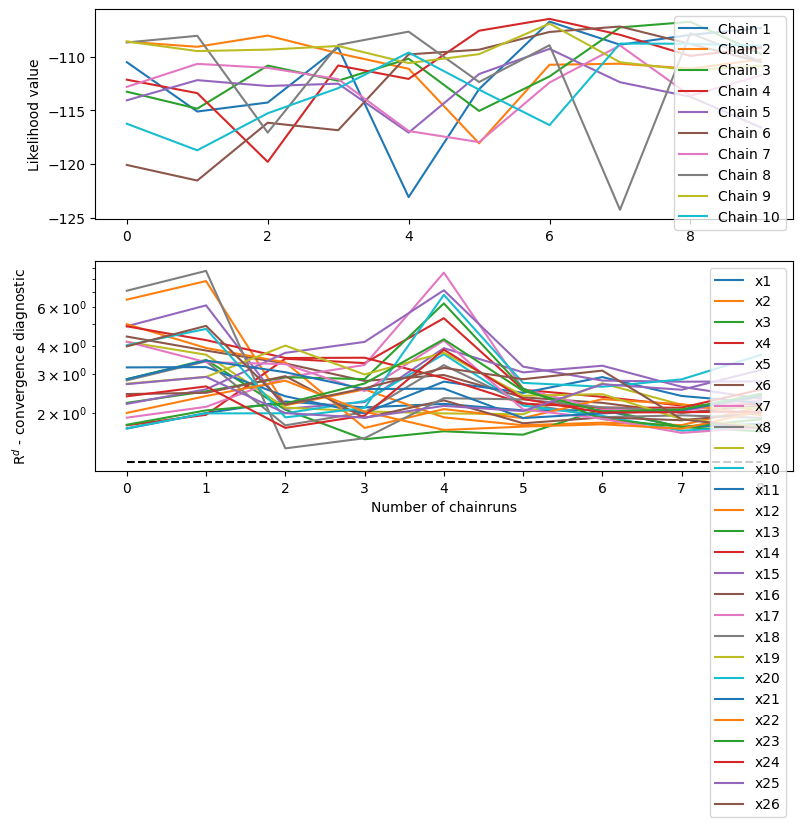

In [15]:
modules.run_dream(wd, sel_pars_df, 100, dbformat="ram", nChains=10, parallel="mpc")